# 1- Data preprocessing and data preparation

- Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
from scipy.stats import iqr

In [2]:
pd.options.display.max_rows = 200

- Import the loaded Data

In [3]:
city = pd.read_csv("Cities.csv").set_index("City")
continent = pd.read_csv("continent.csv")
worldcities = pd.read_csv("worldcities.csv")

- The shape of each dataset.

In [4]:
city.shape, continent.shape, worldcities.shape

((102, 10), (262, 6), (41001, 11))

- Check for Missing values.

In [5]:
city.isnull().sum(), continent.isnull().sum(), worldcities.isnull().sum()

(Id                                   0
 Country                              0
 Smart_Mobility                       0
 Smart_Environment                    0
 Smart_Government                     0
 Smart_Economy                        0
 Smart_People                         0
 Smart_Living                         0
 SmartCity_Index                      0
 SmartCity_Index_relative_Edmonton    0
 dtype: int64,
 Continent_Name                0
 Continent_Code               43
 Country_Name                  0
 Two_Letter_Country_Code       1
 Three_Letter_Country_Code     4
 Country_Number                4
 dtype: int64,
 city              0
 city_ascii        0
 lat               0
 lng               0
 country           0
 iso2             31
 iso3              0
 admin_name       99
 capital       31518
 population      738
 id                0
 dtype: int64)

- From above thier is no missing values in city dataset, But there is in continent and woeldcities datasets.

---------

- Preproccessing city dataset

In [6]:
city.columns = city.columns.str.replace(' ', '')

---------------

- Arrangeing data and scaling.

In [7]:
capital_mapping = {"minor":1, "admin":2, "primary":3}
worldcities["capital"] = worldcities["capital"].map(capital_mapping)
worldcities["capital"] = worldcities["capital"].fillna(0)

----------------------

# In the end of this question the quality of data is very good. Except some of topics that  I processed some of it in last cells and other aspects in the next sections according to needs of each one.

------

# 2.	Visualize a heatmap representing 10 cities' smartness in mobility, environment, government, economy, people, and Living.

> In the begining i well calculate the most cities in each topic according to next steps:
- Find interquartile range to aviod outlier values.
- calculate the mean for each topic.
- find cities that have number greater than or equial to mean.
- display first 10 cities in each topic.Lets go

In [8]:
def Outliers(x):
    Q = iqr(x)
    lower_threshold = np.quantile(x, 0.25) - 1.5 * Q
    upper_threshold = np.quantile(x, 0.75) + 1.5 * Q
    return round(lower_threshold,2), round(upper_threshold,2)

> **1- Most smartness cities in mobility**

In [9]:
def smartness():
    low = Outliers(city["Smart_Mobility"])[0]
    high = Outliers(city["Smart_Mobility"])[1]
    A = city.loc[(city["Smart_Mobility"] >= low) & (city["Smart_Mobility"] <= high)]
    Mean = city["Smart_Mobility"].mean()
    B = city[city["Smart_Mobility"]>= Mean].sort_values("Smart_Mobility")
    res = B["Smart_Mobility"].head(10).values
    return res
smartness()

array([5765, 5782, 5790, 5801, 5808, 5975, 6087, 6122, 6143, 6160],
      dtype=int64)

------------

> **2- Most cities in enviroment**

In [10]:
def enviroment():
    low = Outliers(city["Smart_Environment"])[0]
    high = Outliers(city["Smart_Environment"])[1]
    A = city.loc[(city["Smart_Environment"] >= low) & (city["Smart_Environment"] <= high)]
    Mean = city["Smart_Environment"].mean()
    B = city[city["Smart_Environment"]>= Mean].sort_values("Smart_Environment")
    res = B["Smart_Environment"].head(10).values
    return res
enviroment()

array([5950, 6140, 6340, 6444, 6458, 6468, 6488, 6494, 6496, 6504],
      dtype=int64)

----

> **3- Most cities in government**

In [11]:
def government():
    low = Outliers(city["Smart_Government"])[0]
    high = Outliers(city["Smart_Government"])[1]
    A = city.loc[(city["Smart_Government"] >= low) & (city["Smart_Government"] <= high)]
    Mean = city["Smart_Government"].mean()
    B = city[city["Smart_Government"]>= Mean].sort_values("Smart_Government")
    res = B["Smart_Government"].head(10).values
    return res
government()

array([5932, 5932, 5940, 5946, 5948, 5972, 5986, 6020, 6038, 6038],
      dtype=int64)

----

> **4- Top 10 economic cities**

In [12]:
def Smart_Economy():
    low = Outliers(city["Smart_Economy"])[0]
    high = Outliers(city["Smart_Economy"])[1]
    A = city.loc[(city["Smart_Economy"] >= low) & (city["Smart_Economy"] <= high)]
    Mean = city["Smart_Economy"].mean()
    B = city[city["Smart_Economy"]>= Mean].sort_values("Smart_Economy")
    res = B["Smart_Economy"].head(10).values
    return res
Smart_Economy()

array([6135, 6150, 6180, 6245, 6380, 6385, 6395, 6470, 6520, 6660],
      dtype=int64)

-----

> **5- Top 10 smarts cities people**

In [13]:
def Smart_People():
    low = Outliers(city["Smart_People"])[0]
    high = Outliers(city["Smart_People"])[1]
    A = city.loc[(city["Smart_People"] >= low) & (city["Smart_People"] <= high)]
    Mean = city["Smart_People"].mean()
    B = city[city["Smart_People"]>= Mean].sort_values("Smart_People")
    res = B["Smart_People"].head(10).values
    return res
Smart_People()

array([5930, 5933, 6040, 6185, 6200, 6360, 6363, 6388, 6424, 6503],
      dtype=int64)

---

> **6- Top 10 living cities**

In [14]:
def Smart_Living():
    low = Outliers(city["Smart_Living"])[0]
    high = Outliers(city["Smart_Living"])[1]
    A = city.loc[(city["Smart_Living"] >= low) & (city["Smart_Living"] <= high)]
    Mean = city["Smart_Living"].mean()
    B = city[city["Smart_Living"]>= Mean].sort_values("Smart_Living")
    res = B["Smart_Living"].head(10).values
    return res
Smart_Living()

array([6750, 6750, 6750, 6750, 6750, 6750, 6750, 6820, 7200, 7200],
      dtype=int64)

-----

# Now we are going to combine all above result in one dataset.

In [15]:
result = pd.DataFrame(smartness())
result = result.rename(columns={0: "Smart_Mobility"})
result["Smart_Environment"] = enviroment() 
result["Smart_Government"] = government()
result["Smart_Economy"] = Smart_Economy()
result["Smart_People"] = Smart_People()
result["Smart_Living"] = Smart_Living()
result

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living
0,5765,5950,5932,6135,5930,6750
1,5782,6140,5932,6150,5933,6750
2,5790,6340,5940,6180,6040,6750
3,5801,6444,5946,6245,6185,6750
4,5808,6458,5948,6380,6200,6750
5,5975,6468,5972,6385,6360,6750
6,6087,6488,5986,6395,6363,6750
7,6122,6494,6020,6470,6388,6820
8,6143,6496,6038,6520,6424,7200
9,6160,6504,6038,6660,6503,7200


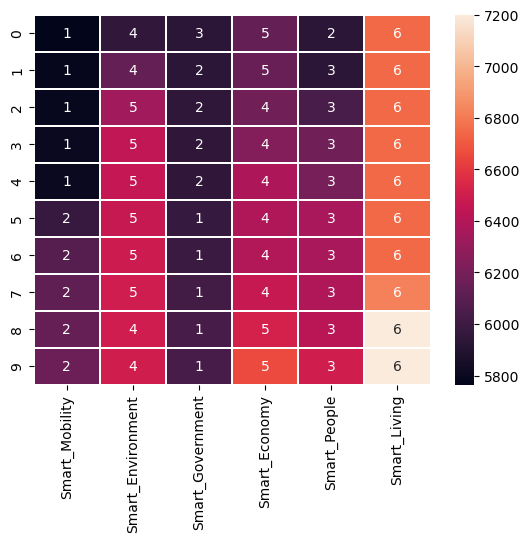

In [16]:
sns.heatmap(result, annot= result.rank(axis="columns"), linewidth=0.1)
plt.show()

# notes:
- The last cell contain heatmap represent top cities in all of topics that we discuss it previously.
- i represent cities according to the value that corresponding to each city not the name of city. And that because best city in certain topic not be best in another topic and that lead to the next cell.

---------

# If we choose cities normal without best one of each topic ...

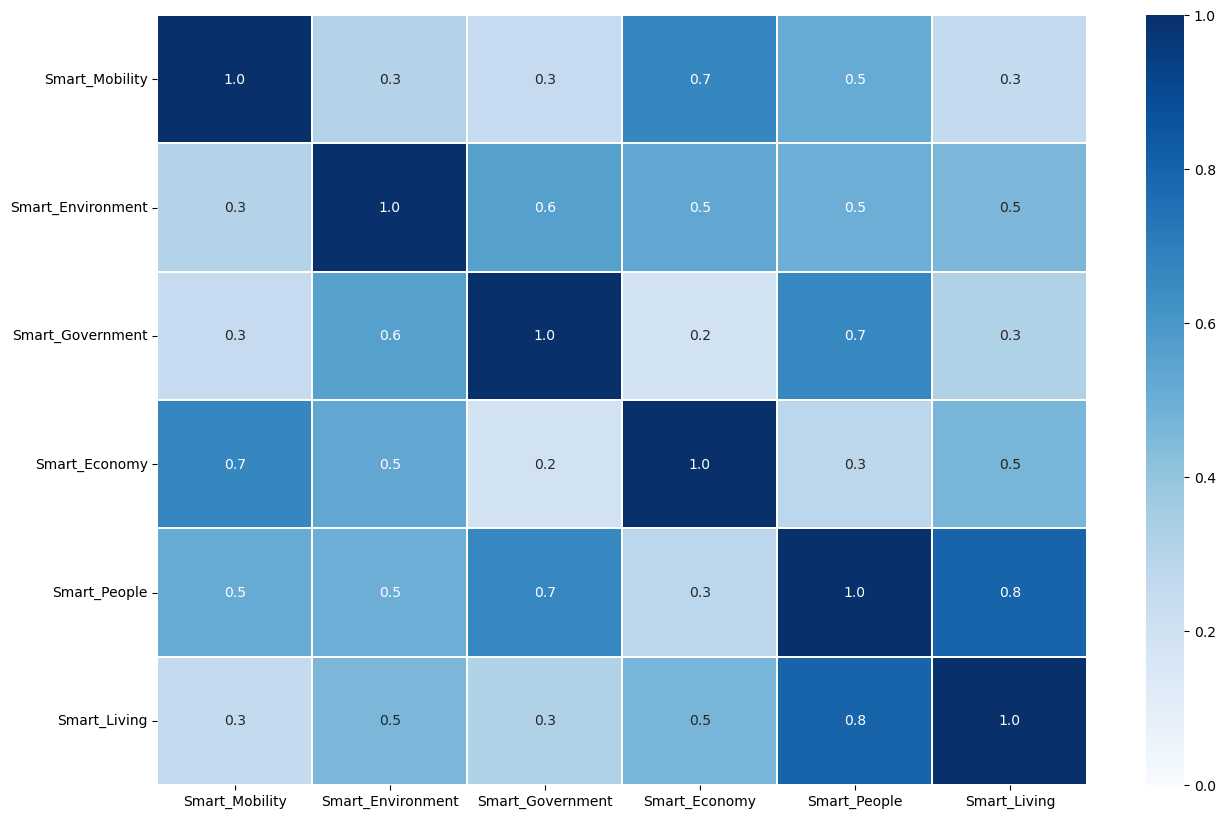

In [17]:
first10 = city.iloc[:,[2,3,4,5,6,7]].head(10)
first10 = abs(first10.corr())
plt.figure(figsize=(15, 10))
sns.heatmap(first10, annot= True,vmin=0, vmax=1, fmt="0.1f", linewidth=0.3, cmap="Blues")
plt.show()

------

# 3. Display a map of these cities.

> **1- Oslo**

In [18]:
folium.Map((59.911946, 10.765552))

> **2- Bergen**

In [19]:
folium.Map((60.38740, 5.328084))

> **3- Amsterdam**

In [20]:
folium.Map((52.361281, 4.891232))

> **4- Copenhagen**

In [21]:
folium.Map((55.672014, 12.561205))

> **5- Stockholm**

In [22]:
folium.Map((59.325267, 18.070737))

> **6- Montreal**

In [23]:
folium.Map((45.536944, -73.660389))

> **7- Vienna**

In [24]:
folium.Map((48.737745, 16.387898))

> **8- Odense**

In [25]:
folium.Map((55.401101, 10.390255))

> **9- Singapore**

In [26]:
folium.Map((1.297519, 103.822944))

> **10- Boston**

In [27]:
folium.Map((42.351794, -71.023171))